# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
В задании вы будете решать задачу бинарной классификации текстов. Вы познакомитесь с основными инструментами sklearn, необходимыми для обработки текстов. Перед применением методов sklearn внимательно читайте документацию к ним: это полезно и помогает делать меньше ошибок.

**Общая информация**

**Срок сдачи:** 1 мая 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com`, X = 3 или 4 (ИАД 3 или ИАД4), указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [HW2, ИАД-X] Фамилия Имя **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
__Старайтесь не копировать похожие участки кода. Везде, где это возможно, оформляйте код в функцию.__

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [198]:
name = "" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<p><b>Варианты</b></p>

В зависимости от варианта нужно будет научиться определять...

**1.** ...является ли SMS сообщение спамом? 
* Зайдите на [страничку с данными](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) на сайте репозитория UCI.
* Нажмите на «Data Folder», скачайте и распакуйте архив.
* Открыть SMSSpamCollection можно с помощью pd.read_csv, указав `sep='\t'`.

**2.** ...положительна или отрицательна рецензия на фильм?
* Зайдите на [страничку с данными](http://www.cs.cornell.edu/people/pabo/movie-review-data/) на сайте Корнельского университета.
* Нажмите на «polarity dataset v2.0» и распакуйте архив. 
* Каждый текстовый файл соответствует одной рецензии. Вам придётся [построить список всех файлов в папке](http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory), а затем последовательно открыть их и прочитать тексты

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные --- список текстов и список соответствующих им меток</li>
    <li>Разбейте объекты на обучающее (train) и тестовое подможества (test) в пропорции 7:3</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настраивать только на обучающем подмножестве, n-gram=1, слова приведите в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [199]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
random_state = 12345 # для всех объектов/методов/моделей

In [201]:
# Параметры логистической регрессии
#penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345

In [202]:
from os import listdir
from os.path import isfile, join

from sklearn.model_selection import train_test_split


def getText(myfiles):
    resTexts = []
    for file in myfiles:
        fd = open(file, 'r')
        resTexts.append(fd.read())
        fd.close()
    return resTexts

# Загрузим исходные данные
pospath = 'pos/'
negpath = 'neg/'
posfiles = [pospath + f for f in listdir(pospath) if isfile(join(pospath, f))] # 'pos/filename.txt'
negfiles = [negpath + f for f in listdir(negpath) if isfile(join(negpath, f))]

myfiles = []
myfiles.extend(posfiles)
myfiles.extend(negfiles)

reviewtype = [1 for x in posfiles] # '1' for positive
reviewtype += [0 for x in negfiles] # '0' for negative

text = getText(myfiles)

# Разобьем их
X_train, X_test, y_train, y_test = train_test_split(text, reviewtype, test_size=0.3, random_state=random_state)

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1, 1))

# Переведем данные в векторный вид алгоритмом TF-IDF, на обучающем подмножестве
tfidf_train = tfidf.fit_transform(X_train)

### KNN
*Parameters:*
1. n = 5
2. metrics is Euclidean

In [204]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf.fit(tfidf_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [205]:
# Время обучения KNN
%timeit clf.fit(tfidf_train, y_train)

1000 loops, best of 3: 1.38 ms per loop


### Логистическая регрессия
*Parameters:*
1. penalty="l2"
2. fit_intercept=True
3. max_iter=100
4. C=1
5. solver="lbfgs"
6. random_state=12345

In [206]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)
lgr.fit(tfidf_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
# Время обучения LogisticRegression
%timeit lgr.fit(tfidf_train, y_train)

10 loops, best of 3: 65.3 ms per loop


### Мультиномиальный наивный Байес
*parameters:*
1. $\alpha=1$ (Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing))

In [208]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1)
mnb.fit(tfidf_train, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [209]:
# Время обучения Наивного Баейса
%timeit mnb.fit(tfidf_train, y_train)

100 loops, best of 3: 5.26 ms per loop


### Качество классификации:

In [210]:
from sklearn.metrics import mean_absolute_error
tfidf_test = tfidf.transform(X_test)

# KNN
y_pred = clf.predict(tfidf_test)
mae_knn = mean_absolute_error(y_true=y_test, y_pred=y_pred)

# LogReg
y_pred = lgr.predict(tfidf_test)
mae_lgr = mean_absolute_error(y_true=y_test, y_pred=y_pred)

# Bayes
y_pred = mnb.predict(tfidf_test)
mae_mnb = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("KNN MAE: {0}\nLogReg MAE: {1}\nBayes MAE: {2}".format(mae_knn, mae_lgr, mae_mnb))

KNN MAE: 0.4116666666666667
LogReg MAE: 0.175
Bayes MAE: 0.25333333333333335


In [211]:
### Время предсказания:
print('KNN: ', end='')
%timeit clf.predict(tfidf_test)
print('LogReg: ', end='')
%timeit lgr.predict(tfidf_test)
print('Bayes: ', end='')
%timeit mnb.predict(tfidf_test)

KNN: 10 loops, best of 3: 162 ms per loop
LogReg: 1000 loops, best of 3: 361 µs per loop
Bayes: 1000 loops, best of 3: 939 µs per loop


## Задача 2.
#### Применение k-folds (3 балла)

<p>1. Повторите решение задачи 1, но вместо одного разделения на обучение и контроль используйте разбиение k-folds (k=4). Вам понадобится повторить все действия 4 раза. <br>
2. Какой классификатор показывал лучшее/худшее качество на тестовой выборке? А при k-folds разбиении? Как вы думаете, обязательно ли в данной задаче оценивать качество на кросс-валидации, или достаточно отложить контрольную выборку и оценивать качество на ней?</p>

In [212]:
random_state = 12345 # для всех объектов/методов/моделей

In [213]:
def TestModel(model, kf, X, y):
    # model -- func for model (already with the right parameters)
    # kf -- KFold splitter
    # X -- data
    # y -- ans
    
    tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1, 1))
    
    # Present data as numpy arrays
    X_nparr = np.asarray(X)
    y_nparr = np.asarray(y)
    y_pred = np.zeros(len(y))
    
    for train_index, test_index in kf.split(X_nparr, y_nparr):
        kf_train = tfidf.fit_transform(X_nparr[train_index])
        kf_test = tfidf.transform(X_nparr[test_index])
        
        model.fit(kf_train, y_nparr[train_index])
        y_pred[test_index] = model.predict(kf_test)
        
    # Get the MAE here:
    return mean_absolute_error(y_true=y, y_pred=y_pred)

In [214]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=random_state)

# Make some aliases
X = text # All the texts. Positive first, negative later
y = reviewtype # Ans

# Test on:
# clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# lgr = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)
# mnb = MultinomialNB(alpha=1)

knn_kf_mae = TestModel(clf, kf, X, y)
lgr_kf_mae = TestModel(lgr, kf, X, y)
mnb_kf_mae = TestModel(mnb, kf, X, y)

print("MAE of different models using KFolds:\nKNN: {0}\nLogisticRegression: {1}\nMultinomialNB: {2}".format(knn_kf_mae, 
                                                                                                           lgr_kf_mae, 
                                                                                                           mnb_kf_mae))

MAE of different models using KFolds:
KNN: 0.535
LogisticRegression: 0.7695
MultinomialNB: 1.0


### Результаты
Как видим, все модели ухудшили свои результаты (в критериях MAE) по сравнению с результатами в Задаче 1.

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Рассмотрим следующие варианты значений гиперпараметров для наших классификаторов:  </p>

<p>K-ближайших соседей</p>

In [215]:
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [216]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [217]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

<p style="padding-left:15px;"> Найдите оптимальные значения гиперпараметров для классификаторов на кросс-валидации. Для этого постройте графики (гиперпараметр)-(качество) на обучении и валидации. <br> _Пояснение:_ вы разбили обучающую выборку на 4 блока. Для каждого значения гиперпараметра 4 раза повторите следующее: берем 3 блока для обучения, по ним настраиваем  TfIdf и обучаем классификатор, считаем качество на этих блоках (качество на обучении) и на оставшемся (качество на валидации). Итоговое значение качества на обучении для данного значения гиперпараметра - это среднее четырех полученных значений качества на обучении, то же самое с итоговым значением качества на валидации.  <br>
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
4. Повторите шаги 2-4 для n-gram=2<br>
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
6. Сделайте выводы по полученным результатам: <ul>
<li>какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?</li>
<li>велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?</li>
<li>что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.</li>
<li>есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?</li>
</ul></p>

In [218]:
random_state = 12345 # для всех объектов/методов/моделей

In [219]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(text, reviewtype, test_size=0.3, random_state=random_state)

kf = KFold(n_splits=4, random_state=random_state)


def TestModelHyperparam(model, X_train, y_train, kf, ng):
    # This function doesn't set ANY hyperparameters in the model alg!
    #
    # model -- A model with the right hyperparameter to test
    # kf -- KFold splitter
    # ng -- (ng, ng) n-gram range
    
    # Present data as numpy arrays
    Xnp_train = np.asarray(X_train)
    ynp_train = np.asarray(y_train)
    
    train_quality = [] # Качество на обучении
    val_quality = []   # Качество на валидации
    
    tfidf = TfidfVectorizer(lowercase=True, ngram_range=(ng, ng))
    for train_index, test_index in kf.split(Xnp_train, ynp_train):
        kf_train = tfidf.fit_transform(Xnp_train[train_index])
        kf_test = tfidf.transform(Xnp_train[test_index])
        
        model.fit(kf_train, ynp_train[train_index])
        
        train_quality.append(accuracy_score(y_true=ynp_train[train_index], y_pred=model.predict(kf_train)))
        val_quality.append(accuracy_score(y_true=ynp_train[test_index], y_pred=model.predict(kf_test)))
        
    return (train_quality, val_quality)


In [220]:
def MakeHyperparamQualityPlot(hdata, hrange,  model_name, hyperparam_name, scatter=False):
    # hdata -- dictionary of special kind: 
    # dict((x, {'train': 0, 'val': 0}) for x in ns)
    fig, ax = plt.subplots()
    ax.set_xlabel(hyperparam_name)
    ax.set_ylabel('Accuracy score')
    ax.set_title(model_name)
    
    train_res = []
    val_res = []
    
    for x in hdata:
       
        vt = hdata[x].get('train', -1)
        vv = hdata[x].get('val', -1)
        
        if vt != -1:
            train_res.append(vt)
        if vv != -1:
            val_res.append(vv)

    if scatter:
        ax.scatter(x=hrange, y=train_res, c='r')
        ax.scatter(x=hrange, y=val_res, c='g')
    else:
        ax.plot(hrange, train_res, 'r')
        ax.plot(hrange, val_res, 'g')



## Найдем оптимальные значения гиперпараметров:
## 1. KNN:

In [221]:
dict((x, {'train': 0, 'val': 0}) for x in ns) # Так будем хранить инфу о среднем качестве на обучении и на валидации 
# для каждого значения гиперпараметра

{1: {'train': 0, 'val': 0},
 21: {'train': 0, 'val': 0},
 41: {'train': 0, 'val': 0},
 61: {'train': 0, 'val': 0},
 81: {'train': 0, 'val': 0},
 101: {'train': 0, 'val': 0},
 121: {'train': 0, 'val': 0},
 141: {'train': 0, 'val': 0}}

In [222]:
def TestKNN_MakePlot(ngram):
    mean_qual_hyperparam = dict((x, {'train': 0, 'val': 0}) for x in ns)
    
    for n in ns:
        clf = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
        train_quality, val_quality = TestModelHyperparam(clf, X_train, y_train, kf, ngram)
        
        mean_qual_hyperparam[n]['train'] = sum(train_quality)/len(train_quality)
        mean_qual_hyperparam[n]['val'] = sum(val_quality)/len(val_quality)
        
    MakeHyperparamQualityPlot(mean_qual_hyperparam, ns, 'KNN', 'Number of neighbors')

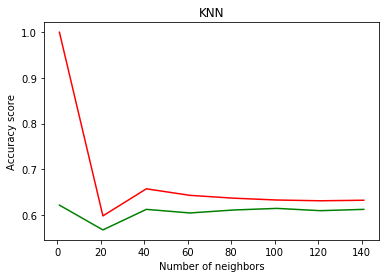

In [223]:
# Для значения n-gram=1:
TestKNN_MakePlot(1)

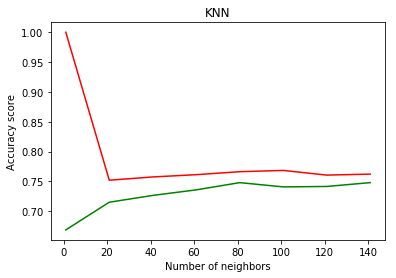

In [224]:
# Для значения n-gram=2:
TestKNN_MakePlot(2)

## 2. Логистическая регрессия

In [225]:
def TestLogSpace_MakePlot(ngram):
    hparam = cs
    mean_qual_hyperparam = dict((x, {'train': 0, 'val': 0}) for x in hparam)
    
    for n in hparam:
        lgr = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=n, solver="lbfgs", random_state=12345)
        train_quality, val_quality = TestModelHyperparam(lgr, X_train, y_train, kf, ngram)
        
        mean_qual_hyperparam[n]['train'] = sum(train_quality)/len(train_quality)
        mean_qual_hyperparam[n]['val'] = sum(val_quality)/len(val_quality)
    
    # Make a scatter plot here
    MakeHyperparamQualityPlot(mean_qual_hyperparam, hparam, 'Логистическая регрессия', 'Параметр регуляризации', True)

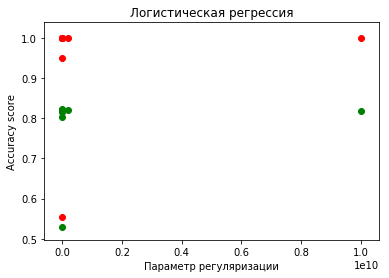

In [226]:
# n-gram=1
TestLogSpace_MakePlot(1)

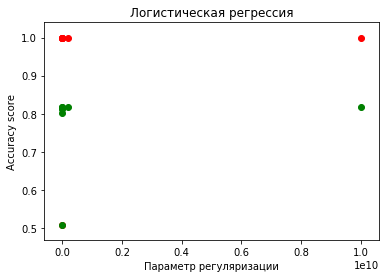

In [227]:
# n-gram=2
TestLogSpace_MakePlot(2)

## 3. Мультиномиальный наивный Байес

In [228]:
def TestMNB_MakePlot(ngram):
    hparam = alphas
    mean_qual_hyperparam = dict((x, {'train': 0, 'val': 0}) for x in hparam)
    
    for n in hparam:
        mnb = MultinomialNB(alpha=n)
        train_quality, val_quality = TestModelHyperparam(lgr, X_train, y_train, kf, ngram)
        
        mean_qual_hyperparam[n]['train'] = sum(train_quality)/len(train_quality)
        mean_qual_hyperparam[n]['val'] = sum(val_quality)/len(val_quality)
    
    MakeHyperparamQualityPlot(mean_qual_hyperparam, hparam, 'Мультиномиальный наивный Байес', 'Сглаживающий параметр', True)

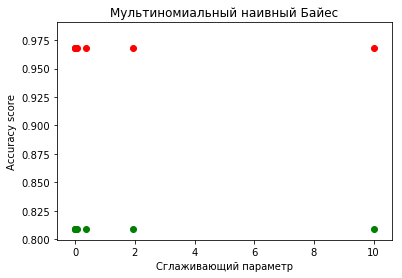

In [229]:
# n-gram=1
TestMNB_MakePlot(1)

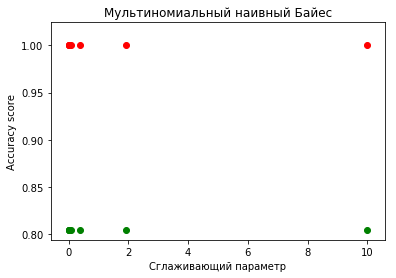

In [230]:
# n-gram=2
TestMNB_MakePlot(2)

## Обучение на всем об. подмножестве, тестирование на всем тестовом

In [231]:
import time

def TestModelOnce(X_train, X_test, y_train, y_test, model, ng):

    tfidf = TfidfVectorizer(lowercase=True, ngram_range=(ng, ng))
    tfidf_train = tfidf.fit_transform(X_train)
    tfidf_test = tfidf.transform(X_test)

    lst = time.time()
    model.fit(tfidf_train, y_train)
    lfn = time.time()
    y_pred = model.predict(tfidf_test)
    predfn = time.time()
    
    print('> Model {0}\nLEARNING TIME: {1} seconds\nPREDICTION TIME: {2} seconds'.format(model, lfn - lst, predfn - lfn))
    print('')

    return y_pred

def TestModelNG(ngram, clf, lgr, mnb):
    rs = {'clf':[], 'lgr':[], 'mnb':[]}
    rs['clf'] = TestModelOnce(X_train, X_test, y_train, y_test, clf, ngram)
    rs['lgr'] = TestModelOnce(X_train, X_test, y_train, y_test, lgr, ngram)
    rs['mnb'] = TestModelOnce(X_train, X_test, y_train, y_test, mnb, ngram)
    return rs

def GetTestModelResult(res):
    ac = {'clf':0, 'lgr':0, 'mnb':0}
    for key in ac:
        ac[key] = accuracy_score(y_true=y_test, y_pred=res[key])
    print("Accuracy scores by model:")
    for key in ac:
        print(key, end=': ')
        print(ac[key])

In [232]:
# N-GRAM=1
clf = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
lgr = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e10, solver="lbfgs", random_state=12345)
mnb = MultinomialNB(alpha=10)

rs_ngr1 = TestModelNG(1, clf, lgr, mnb)

> Model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')
LEARNING TIME: 0.0016744136810302734 seconds
PREDICTION TIME: 0.19688105583190918 seconds

> Model LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
LEARNING TIME: 0.1262826919555664 seconds
PREDICTION TIME: 0.00049591064453125 seconds

> Model MultinomialNB(alpha=10, class_prior=None, fit_prior=True)
LEARNING TIME: 0.02840280532836914 seconds
PREDICTION TIME: 0.0011188983917236328 seconds



In [233]:
# N-GRAM=2
clf = KNeighborsClassifier(n_neighbors=80, metric='euclidean')

rs_ngr2 = TestModelNG(2, clf, lgr, mnb)

> Model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=80, p=2,
           weights='uniform')
LEARNING TIME: 0.0023131370544433594 seconds
PREDICTION TIME: 0.1587202548980713 seconds

> Model LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
LEARNING TIME: 1.0312399864196777 seconds
PREDICTION TIME: 0.0010461807250976562 seconds

> Model MultinomialNB(alpha=10, class_prior=None, fit_prior=True)
LEARNING TIME: 0.03448152542114258 seconds
PREDICTION TIME: 0.004630088806152344 seconds



### Accuracy score моделей в зависимости от n-gram:

In [234]:
print("N-GRAM=1:")
GetTestModelResult(rs_ngr1)
print('')
print("N-GRAM=2:")
GetTestModelResult(rs_ngr2)

N-GRAM=1:
Accuracy scores by model:
clf: 0.638333333333
lgr: 0.855
mnb: 0.561666666667

N-GRAM=2:
Accuracy scores by model:
clf: 0.765
lgr: 0.846666666667
mnb: 0.705


## Выводы:
### Для значения параметра n-gram=1:

*Качество:*
1. Наивысшее качество предсказания для KNN при 100 соседях
2. Для LogReg и Байеса трудно сказать однозначно (вероятно, следует выбрать 1e10 и 10 соотв). Графики получаются малоинформативными.

*Время работы:*
1. KNN обучение: 1.6 мсек, предсказание: 200 мсек
2. LogReg обучение: 125.6 мсек, предсказание: 1.1 мсек
3. Bayes обучение: 5.3 мсек, предсказание: 1.02 мсек

### Для значения параметра n-gram=2:
*Качество:*
1. Наивысшее качество предсказания для KNN при ~80 соседях
2. Для LogReg и Байеса трудно сказать однозначно. Графики получаются малоинформативными.

*Время работы:*
1. KNN обучение: 2.52 мсек, предсказание: 171 мсек
2. LogReg обучение: 1107 мсек, предсказание: 1.113 мсек
3. Bayes обучение: 34.82 мсек, предсказание: 4.33 мсек

Достаточно сильные различия в характере графика гиперпараметр-качество наблюдаются в модели KNN при измерении значения гиперпараметра n-gram в TF-IDF.

Для n-gram=2:
* в KNN увеличилось вдвое время обучения, немного уменьшилось время предсказания.
* В LogReg в 10 раз увеличилось время обучения
* в МНБ в 6 раз увеличилосб время обучения, в 4 раза время предсказания.

Для n-gram=2 (обучение на полной тестовой выборке):
* KNN -- Повышение качества на 0.1
* LGR -- Снижение качества на 0.01
* МНБ -- Повышение качества на 0.14

Для всех значений параметров наивысшее качество показывает модель Логистической регрессии с параметрами:
``C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
``

Так как при переходе от n-gram=1 к 2 LogReg начинает обучаться в 10 раз медленнее, гиперпараметр TF-IDF n-gram оставляем равным единице.

N-Грамма есть последовательность из N элементов. Например, слов текста. Разница значений 1 и 2 этого параметра в том, что при n-gram=2 будут рассматриваться биграммы. Т.е. этот параметр определяет, на куски какого размера будет разбит текст. 

Как можно заметить, при увеличении этого параметра время обучения пногих алгоритмов сильно увеличивается.



## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (+3 балла к сумме по всем ДЗ) 

<p>Изучите, что такое feature hashing (достаточно разобаться с документацией sklearn) и кратко опишите. Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [235]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>В этом задании можно воспользоваться GridSearchCV</p>

# Задача 5. (опционально)
__Простой прототип (+ 2 балла к сумме по всем ДЗ)__

Напишите функцию, которая берет на вход произвольную строку и возвращает для нее предсказание для вашей задачи. Придумайте по 3 примера строк для положительного и отрицательного класса, сделайте для них предсказание. Совпадают ли ваши метки и предсказания классификатора? Оцените (любым способом), насколько придуманные вами тексты похожи на объекты датасета, с которым вы работали.


In [236]:
def predict_class_for_text(s):
    pass